In [1]:
import librosa

import matplotlib.pyplot as plt
import numpy as np

import os

import soundfile as sf

In [2]:
filename_u = "Signal_u.wav"
filename_r = "Signal_r.wav"

u, sr = librosa.load(os.path.join('data', filename_u))
r, sr = librosa.load(os.path.join('data', filename_r))

In [3]:
time_total = float(max(len(u), len(r))) / sr

In [4]:
time = [float(timeframe) / sr for timeframe in range(max(len(u), len(r)))]

In [5]:
def correlate(x, y, shift):
    value = 0
    
    for k in range(len(x)):
        y_idx = k + shift
        
        x_val = x[k]
        y_val = 1
        
        if (y_idx > (len(y) - 1)):
            y_val = 0
        elif (y_idx < 0):
            y_val = 0
        else:
            y_val = y[y_idx]
        
        value += (x_val * y_val)
        
    return value / float(len(x))

In [6]:
def get_beta_opt(u, r, n):
    phi_ru_0 = np.zeros(n)
    phi_uu = np.zeros(shape=(n, n))
    
    for i in range(n):
        phi_ru_0[i] = correlate(r, u, -i)
        print("phi_ru_0 " + str(i) + " = " + str(phi_ru_0[i]))
        
    for i in range(n):
        for j in range(i, n):
            value = correlate(u, u, i)
            phi_uu[i, j] = value
            phi_uu[j, i] = value
            print("phi_uu " + str(i) + " " +str(j) + " = " + str(value))
                  
    print("matrices done")
                  
    beta_opt = np.linalg.inv(phi_uu) @ phi_ru_0
                  
    return beta_opt

In [7]:
def get_y(u, beta_opt):
    y = np.zeros(len(u))
    
    for timeframe_idx in range(len(u)):
        
        y_val_tmp = 0
        
        tmp_idx = timeframe_idx
        
        for filter_coeff_idx in range(len(beta_opt)):
            y_val_tmp += (beta_opt[filter_coeff_idx] * u[tmp_idx])
            if (tmp_idx > 0):
                tmp_idx -= 1
            else:
                break
                
        y[timeframe_idx] = y_val_tmp
        
    return y

In [8]:
a = get_beta_opt(u, r, 100)

phi_ru_0 0 = 1.081102184613238e-05
phi_ru_0 1 = 1.1403545219413971e-05
phi_ru_0 2 = 1.1977655776120325e-05
phi_ru_0 3 = 1.260351531665037e-05
phi_ru_0 4 = 1.3241546672890459e-05
phi_ru_0 5 = 1.3580491402662394e-05
phi_ru_0 6 = 1.3802153978452963e-05
phi_ru_0 7 = 1.4094584682744548e-05
phi_ru_0 8 = 1.3999351913700908e-05
phi_ru_0 9 = 1.39333349052236e-05
phi_ru_0 10 = 1.4024888518297239e-05
phi_ru_0 11 = 1.3900843604286368e-05
phi_ru_0 12 = 1.4005774409370298e-05
phi_ru_0 13 = 1.4062382458092244e-05
phi_ru_0 14 = 1.389467788257484e-05
phi_ru_0 15 = 1.3523426437418459e-05
phi_ru_0 16 = 1.28893324199011e-05
phi_ru_0 17 = 1.2482908038588967e-05
phi_ru_0 18 = 1.2202449674720079e-05
phi_ru_0 19 = 1.2023474560535491e-05
phi_ru_0 20 = 1.1861493694182678e-05
phi_ru_0 21 = 1.1350759408287713e-05
phi_ru_0 22 = 1.0758857395466663e-05
phi_ru_0 23 = 1.0020890321518811e-05
phi_ru_0 24 = 8.912089084483675e-06
phi_ru_0 25 = 7.754126510099558e-06
phi_ru_0 26 = 6.601229119939579e-06
phi_ru_0 27 = 5.48977

phi_uu 1 27 = 0.0015045822807596095
phi_uu 1 28 = 0.0015045822807596095
phi_uu 1 29 = 0.0015045822807596095
phi_uu 1 30 = 0.0015045822807596095
phi_uu 1 31 = 0.0015045822807596095
phi_uu 1 32 = 0.0015045822807596095
phi_uu 1 33 = 0.0015045822807596095
phi_uu 1 34 = 0.0015045822807596095
phi_uu 1 35 = 0.0015045822807596095
phi_uu 1 36 = 0.0015045822807596095
phi_uu 1 37 = 0.0015045822807596095
phi_uu 1 38 = 0.0015045822807596095
phi_uu 1 39 = 0.0015045822807596095
phi_uu 1 40 = 0.0015045822807596095
phi_uu 1 41 = 0.0015045822807596095
phi_uu 1 42 = 0.0015045822807596095
phi_uu 1 43 = 0.0015045822807596095
phi_uu 1 44 = 0.0015045822807596095
phi_uu 1 45 = 0.0015045822807596095
phi_uu 1 46 = 0.0015045822807596095
phi_uu 1 47 = 0.0015045822807596095
phi_uu 1 48 = 0.0015045822807596095
phi_uu 1 49 = 0.0015045822807596095
phi_uu 1 50 = 0.0015045822807596095
phi_uu 1 51 = 0.0015045822807596095
phi_uu 1 52 = 0.0015045822807596095
phi_uu 1 53 = 0.0015045822807596095
phi_uu 1 54 = 0.001504582280

phi_uu 3 60 = 0.0013883168581814956
phi_uu 3 61 = 0.0013883168581814956
phi_uu 3 62 = 0.0013883168581814956
phi_uu 3 63 = 0.0013883168581814956
phi_uu 3 64 = 0.0013883168581814956
phi_uu 3 65 = 0.0013883168581814956
phi_uu 3 66 = 0.0013883168581814956
phi_uu 3 67 = 0.0013883168581814956
phi_uu 3 68 = 0.0013883168581814956
phi_uu 3 69 = 0.0013883168581814956
phi_uu 3 70 = 0.0013883168581814956
phi_uu 3 71 = 0.0013883168581814956
phi_uu 3 72 = 0.0013883168581814956
phi_uu 3 73 = 0.0013883168581814956
phi_uu 3 74 = 0.0013883168581814956
phi_uu 3 75 = 0.0013883168581814956
phi_uu 3 76 = 0.0013883168581814956
phi_uu 3 77 = 0.0013883168581814956
phi_uu 3 78 = 0.0013883168581814956
phi_uu 3 79 = 0.0013883168581814956
phi_uu 3 80 = 0.0013883168581814956
phi_uu 3 81 = 0.0013883168581814956
phi_uu 3 82 = 0.0013883168581814956
phi_uu 3 83 = 0.0013883168581814956
phi_uu 3 84 = 0.0013883168581814956
phi_uu 3 85 = 0.0013883168581814956
phi_uu 3 86 = 0.0013883168581814956
phi_uu 3 87 = 0.001388316858

phi_uu 6 6 = 0.0012024527794300525
phi_uu 6 7 = 0.0012024527794300525
phi_uu 6 8 = 0.0012024527794300525
phi_uu 6 9 = 0.0012024527794300525
phi_uu 6 10 = 0.0012024527794300525
phi_uu 6 11 = 0.0012024527794300525
phi_uu 6 12 = 0.0012024527794300525
phi_uu 6 13 = 0.0012024527794300525
phi_uu 6 14 = 0.0012024527794300525
phi_uu 6 15 = 0.0012024527794300525
phi_uu 6 16 = 0.0012024527794300525
phi_uu 6 17 = 0.0012024527794300525
phi_uu 6 18 = 0.0012024527794300525
phi_uu 6 19 = 0.0012024527794300525
phi_uu 6 20 = 0.0012024527794300525
phi_uu 6 21 = 0.0012024527794300525
phi_uu 6 22 = 0.0012024527794300525
phi_uu 6 23 = 0.0012024527794300525
phi_uu 6 24 = 0.0012024527794300525
phi_uu 6 25 = 0.0012024527794300525
phi_uu 6 26 = 0.0012024527794300525
phi_uu 6 27 = 0.0012024527794300525
phi_uu 6 28 = 0.0012024527794300525
phi_uu 6 29 = 0.0012024527794300525
phi_uu 6 30 = 0.0012024527794300525
phi_uu 6 31 = 0.0012024527794300525
phi_uu 6 32 = 0.0012024527794300525
phi_uu 6 33 = 0.0012024527794300

phi_uu 8 52 = 0.0010848130854711443
phi_uu 8 53 = 0.0010848130854711443
phi_uu 8 54 = 0.0010848130854711443
phi_uu 8 55 = 0.0010848130854711443
phi_uu 8 56 = 0.0010848130854711443
phi_uu 8 57 = 0.0010848130854711443
phi_uu 8 58 = 0.0010848130854711443
phi_uu 8 59 = 0.0010848130854711443
phi_uu 8 60 = 0.0010848130854711443
phi_uu 8 61 = 0.0010848130854711443
phi_uu 8 62 = 0.0010848130854711443
phi_uu 8 63 = 0.0010848130854711443
phi_uu 8 64 = 0.0010848130854711443
phi_uu 8 65 = 0.0010848130854711443
phi_uu 8 66 = 0.0010848130854711443
phi_uu 8 67 = 0.0010848130854711443
phi_uu 8 68 = 0.0010848130854711443
phi_uu 8 69 = 0.0010848130854711443
phi_uu 8 70 = 0.0010848130854711443
phi_uu 8 71 = 0.0010848130854711443
phi_uu 8 72 = 0.0010848130854711443
phi_uu 8 73 = 0.0010848130854711443
phi_uu 8 74 = 0.0010848130854711443
phi_uu 8 75 = 0.0010848130854711443
phi_uu 8 76 = 0.0010848130854711443
phi_uu 8 77 = 0.0010848130854711443
phi_uu 8 78 = 0.0010848130854711443
phi_uu 8 79 = 0.001084813085

phi_uu 10 97 = 0.0009750025561341848
phi_uu 10 98 = 0.0009750025561341848
phi_uu 10 99 = 0.0009750025561341848
phi_uu 11 11 = 0.0009264270249822378
phi_uu 11 12 = 0.0009264270249822378
phi_uu 11 13 = 0.0009264270249822378
phi_uu 11 14 = 0.0009264270249822378
phi_uu 11 15 = 0.0009264270249822378
phi_uu 11 16 = 0.0009264270249822378
phi_uu 11 17 = 0.0009264270249822378
phi_uu 11 18 = 0.0009264270249822378
phi_uu 11 19 = 0.0009264270249822378
phi_uu 11 20 = 0.0009264270249822378
phi_uu 11 21 = 0.0009264270249822378
phi_uu 11 22 = 0.0009264270249822378
phi_uu 11 23 = 0.0009264270249822378
phi_uu 11 24 = 0.0009264270249822378
phi_uu 11 25 = 0.0009264270249822378
phi_uu 11 26 = 0.0009264270249822378
phi_uu 11 27 = 0.0009264270249822378
phi_uu 11 28 = 0.0009264270249822378
phi_uu 11 29 = 0.0009264270249822378
phi_uu 11 30 = 0.0009264270249822378
phi_uu 11 31 = 0.0009264270249822378
phi_uu 11 32 = 0.0009264270249822378
phi_uu 11 33 = 0.0009264270249822378
phi_uu 11 34 = 0.0009264270249822378
p

phi_uu 13 55 = 0.0008404802996766658
phi_uu 13 56 = 0.0008404802996766658
phi_uu 13 57 = 0.0008404802996766658
phi_uu 13 58 = 0.0008404802996766658
phi_uu 13 59 = 0.0008404802996766658
phi_uu 13 60 = 0.0008404802996766658
phi_uu 13 61 = 0.0008404802996766658
phi_uu 13 62 = 0.0008404802996766658
phi_uu 13 63 = 0.0008404802996766658
phi_uu 13 64 = 0.0008404802996766658
phi_uu 13 65 = 0.0008404802996766658
phi_uu 13 66 = 0.0008404802996766658
phi_uu 13 67 = 0.0008404802996766658
phi_uu 13 68 = 0.0008404802996766658
phi_uu 13 69 = 0.0008404802996766658
phi_uu 13 70 = 0.0008404802996766658
phi_uu 13 71 = 0.0008404802996766658
phi_uu 13 72 = 0.0008404802996766658
phi_uu 13 73 = 0.0008404802996766658
phi_uu 13 74 = 0.0008404802996766658
phi_uu 13 75 = 0.0008404802996766658
phi_uu 13 76 = 0.0008404802996766658
phi_uu 13 77 = 0.0008404802996766658
phi_uu 13 78 = 0.0008404802996766658
phi_uu 13 79 = 0.0008404802996766658
phi_uu 13 80 = 0.0008404802996766658
phi_uu 13 81 = 0.0008404802996766658
p

phi_uu 16 22 = 0.0007209248558174168
phi_uu 16 23 = 0.0007209248558174168
phi_uu 16 24 = 0.0007209248558174168
phi_uu 16 25 = 0.0007209248558174168
phi_uu 16 26 = 0.0007209248558174168
phi_uu 16 27 = 0.0007209248558174168
phi_uu 16 28 = 0.0007209248558174168
phi_uu 16 29 = 0.0007209248558174168
phi_uu 16 30 = 0.0007209248558174168
phi_uu 16 31 = 0.0007209248558174168
phi_uu 16 32 = 0.0007209248558174168
phi_uu 16 33 = 0.0007209248558174168
phi_uu 16 34 = 0.0007209248558174168
phi_uu 16 35 = 0.0007209248558174168
phi_uu 16 36 = 0.0007209248558174168
phi_uu 16 37 = 0.0007209248558174168
phi_uu 16 38 = 0.0007209248558174168
phi_uu 16 39 = 0.0007209248558174168
phi_uu 16 40 = 0.0007209248558174168
phi_uu 16 41 = 0.0007209248558174168
phi_uu 16 42 = 0.0007209248558174168
phi_uu 16 43 = 0.0007209248558174168
phi_uu 16 44 = 0.0007209248558174168
phi_uu 16 45 = 0.0007209248558174168
phi_uu 16 46 = 0.0007209248558174168
phi_uu 16 47 = 0.0007209248558174168
phi_uu 16 48 = 0.0007209248558174168
p

phi_uu 18 79 = 0.0006505051781525967
phi_uu 18 80 = 0.0006505051781525967
phi_uu 18 81 = 0.0006505051781525967
phi_uu 18 82 = 0.0006505051781525967
phi_uu 18 83 = 0.0006505051781525967
phi_uu 18 84 = 0.0006505051781525967
phi_uu 18 85 = 0.0006505051781525967
phi_uu 18 86 = 0.0006505051781525967
phi_uu 18 87 = 0.0006505051781525967
phi_uu 18 88 = 0.0006505051781525967
phi_uu 18 89 = 0.0006505051781525967
phi_uu 18 90 = 0.0006505051781525967
phi_uu 18 91 = 0.0006505051781525967
phi_uu 18 92 = 0.0006505051781525967
phi_uu 18 93 = 0.0006505051781525967
phi_uu 18 94 = 0.0006505051781525967
phi_uu 18 95 = 0.0006505051781525967
phi_uu 18 96 = 0.0006505051781525967
phi_uu 18 97 = 0.0006505051781525967
phi_uu 18 98 = 0.0006505051781525967
phi_uu 18 99 = 0.0006505051781525967
phi_uu 19 19 = 0.0006221306807680775
phi_uu 19 20 = 0.0006221306807680775
phi_uu 19 21 = 0.0006221306807680775
phi_uu 19 22 = 0.0006221306807680775
phi_uu 19 23 = 0.0006221306807680775
phi_uu 19 24 = 0.0006221306807680775
p

phi_uu 21 61 = 0.0005845717623552009
phi_uu 21 62 = 0.0005845717623552009
phi_uu 21 63 = 0.0005845717623552009
phi_uu 21 64 = 0.0005845717623552009
phi_uu 21 65 = 0.0005845717623552009
phi_uu 21 66 = 0.0005845717623552009
phi_uu 21 67 = 0.0005845717623552009
phi_uu 21 68 = 0.0005845717623552009
phi_uu 21 69 = 0.0005845717623552009
phi_uu 21 70 = 0.0005845717623552009
phi_uu 21 71 = 0.0005845717623552009
phi_uu 21 72 = 0.0005845717623552009
phi_uu 21 73 = 0.0005845717623552009
phi_uu 21 74 = 0.0005845717623552009
phi_uu 21 75 = 0.0005845717623552009
phi_uu 21 76 = 0.0005845717623552009
phi_uu 21 77 = 0.0005845717623552009
phi_uu 21 78 = 0.0005845717623552009
phi_uu 21 79 = 0.0005845717623552009
phi_uu 21 80 = 0.0005845717623552009
phi_uu 21 81 = 0.0005845717623552009
phi_uu 21 82 = 0.0005845717623552009
phi_uu 21 83 = 0.0005845717623552009
phi_uu 21 84 = 0.0005845717623552009
phi_uu 21 85 = 0.0005845717623552009
phi_uu 21 86 = 0.0005845717623552009
phi_uu 21 87 = 0.0005845717623552009
p

phi_uu 24 52 = 0.0005371154359470264
phi_uu 24 53 = 0.0005371154359470264
phi_uu 24 54 = 0.0005371154359470264
phi_uu 24 55 = 0.0005371154359470264
phi_uu 24 56 = 0.0005371154359470264
phi_uu 24 57 = 0.0005371154359470264
phi_uu 24 58 = 0.0005371154359470264
phi_uu 24 59 = 0.0005371154359470264
phi_uu 24 60 = 0.0005371154359470264
phi_uu 24 61 = 0.0005371154359470264
phi_uu 24 62 = 0.0005371154359470264
phi_uu 24 63 = 0.0005371154359470264
phi_uu 24 64 = 0.0005371154359470264
phi_uu 24 65 = 0.0005371154359470264
phi_uu 24 66 = 0.0005371154359470264
phi_uu 24 67 = 0.0005371154359470264
phi_uu 24 68 = 0.0005371154359470264
phi_uu 24 69 = 0.0005371154359470264
phi_uu 24 70 = 0.0005371154359470264
phi_uu 24 71 = 0.0005371154359470264
phi_uu 24 72 = 0.0005371154359470264
phi_uu 24 73 = 0.0005371154359470264
phi_uu 24 74 = 0.0005371154359470264
phi_uu 24 75 = 0.0005371154359470264
phi_uu 24 76 = 0.0005371154359470264
phi_uu 24 77 = 0.0005371154359470264
phi_uu 24 78 = 0.0005371154359470264
p

phi_uu 27 50 = 0.0004466465496548196
phi_uu 27 51 = 0.0004466465496548196
phi_uu 27 52 = 0.0004466465496548196
phi_uu 27 53 = 0.0004466465496548196
phi_uu 27 54 = 0.0004466465496548196
phi_uu 27 55 = 0.0004466465496548196
phi_uu 27 56 = 0.0004466465496548196
phi_uu 27 57 = 0.0004466465496548196
phi_uu 27 58 = 0.0004466465496548196
phi_uu 27 59 = 0.0004466465496548196
phi_uu 27 60 = 0.0004466465496548196
phi_uu 27 61 = 0.0004466465496548196
phi_uu 27 62 = 0.0004466465496548196
phi_uu 27 63 = 0.0004466465496548196
phi_uu 27 64 = 0.0004466465496548196
phi_uu 27 65 = 0.0004466465496548196
phi_uu 27 66 = 0.0004466465496548196
phi_uu 27 67 = 0.0004466465496548196
phi_uu 27 68 = 0.0004466465496548196
phi_uu 27 69 = 0.0004466465496548196
phi_uu 27 70 = 0.0004466465496548196
phi_uu 27 71 = 0.0004466465496548196
phi_uu 27 72 = 0.0004466465496548196
phi_uu 27 73 = 0.0004466465496548196
phi_uu 27 74 = 0.0004466465496548196
phi_uu 27 75 = 0.0004466465496548196
phi_uu 27 76 = 0.0004466465496548196
p

phi_uu 30 57 = 0.0003453426541290337
phi_uu 30 58 = 0.0003453426541290337
phi_uu 30 59 = 0.0003453426541290337
phi_uu 30 60 = 0.0003453426541290337
phi_uu 30 61 = 0.0003453426541290337
phi_uu 30 62 = 0.0003453426541290337
phi_uu 30 63 = 0.0003453426541290337
phi_uu 30 64 = 0.0003453426541290337
phi_uu 30 65 = 0.0003453426541290337
phi_uu 30 66 = 0.0003453426541290337
phi_uu 30 67 = 0.0003453426541290337
phi_uu 30 68 = 0.0003453426541290337
phi_uu 30 69 = 0.0003453426541290337
phi_uu 30 70 = 0.0003453426541290337
phi_uu 30 71 = 0.0003453426541290337
phi_uu 30 72 = 0.0003453426541290337
phi_uu 30 73 = 0.0003453426541290337
phi_uu 30 74 = 0.0003453426541290337
phi_uu 30 75 = 0.0003453426541290337
phi_uu 30 76 = 0.0003453426541290337
phi_uu 30 77 = 0.0003453426541290337
phi_uu 30 78 = 0.0003453426541290337
phi_uu 30 79 = 0.0003453426541290337
phi_uu 30 80 = 0.0003453426541290337
phi_uu 30 81 = 0.0003453426541290337
phi_uu 30 82 = 0.0003453426541290337
phi_uu 30 83 = 0.0003453426541290337
p

phi_uu 33 75 = 0.0002624587510319613
phi_uu 33 76 = 0.0002624587510319613
phi_uu 33 77 = 0.0002624587510319613
phi_uu 33 78 = 0.0002624587510319613
phi_uu 33 79 = 0.0002624587510319613
phi_uu 33 80 = 0.0002624587510319613
phi_uu 33 81 = 0.0002624587510319613
phi_uu 33 82 = 0.0002624587510319613
phi_uu 33 83 = 0.0002624587510319613
phi_uu 33 84 = 0.0002624587510319613
phi_uu 33 85 = 0.0002624587510319613
phi_uu 33 86 = 0.0002624587510319613
phi_uu 33 87 = 0.0002624587510319613
phi_uu 33 88 = 0.0002624587510319613
phi_uu 33 89 = 0.0002624587510319613
phi_uu 33 90 = 0.0002624587510319613
phi_uu 33 91 = 0.0002624587510319613
phi_uu 33 92 = 0.0002624587510319613
phi_uu 33 93 = 0.0002624587510319613
phi_uu 33 94 = 0.0002624587510319613
phi_uu 33 95 = 0.0002624587510319613
phi_uu 33 96 = 0.0002624587510319613
phi_uu 33 97 = 0.0002624587510319613
phi_uu 33 98 = 0.0002624587510319613
phi_uu 33 99 = 0.0002624587510319613
phi_uu 34 34 = 0.00023733468892767008
phi_uu 34 35 = 0.00023733468892767008

phi_uu 36 97 = 0.00018753834672894949
phi_uu 36 98 = 0.00018753834672894949
phi_uu 36 99 = 0.00018753834672894949
phi_uu 37 37 = 0.00016175240636799997
phi_uu 37 38 = 0.00016175240636799997
phi_uu 37 39 = 0.00016175240636799997
phi_uu 37 40 = 0.00016175240636799997
phi_uu 37 41 = 0.00016175240636799997
phi_uu 37 42 = 0.00016175240636799997
phi_uu 37 43 = 0.00016175240636799997
phi_uu 37 44 = 0.00016175240636799997
phi_uu 37 45 = 0.00016175240636799997
phi_uu 37 46 = 0.00016175240636799997
phi_uu 37 47 = 0.00016175240636799997
phi_uu 37 48 = 0.00016175240636799997
phi_uu 37 49 = 0.00016175240636799997
phi_uu 37 50 = 0.00016175240636799997
phi_uu 37 51 = 0.00016175240636799997
phi_uu 37 52 = 0.00016175240636799997
phi_uu 37 53 = 0.00016175240636799997
phi_uu 37 54 = 0.00016175240636799997
phi_uu 37 55 = 0.00016175240636799997
phi_uu 37 56 = 0.00016175240636799997
phi_uu 37 57 = 0.00016175240636799997
phi_uu 37 58 = 0.00016175240636799997
phi_uu 37 59 = 0.00016175240636799997
phi_uu 37 60

phi_uu 40 68 = 7.418500910075365e-05
phi_uu 40 69 = 7.418500910075365e-05
phi_uu 40 70 = 7.418500910075365e-05
phi_uu 40 71 = 7.418500910075365e-05
phi_uu 40 72 = 7.418500910075365e-05
phi_uu 40 73 = 7.418500910075365e-05
phi_uu 40 74 = 7.418500910075365e-05
phi_uu 40 75 = 7.418500910075365e-05
phi_uu 40 76 = 7.418500910075365e-05
phi_uu 40 77 = 7.418500910075365e-05
phi_uu 40 78 = 7.418500910075365e-05
phi_uu 40 79 = 7.418500910075365e-05
phi_uu 40 80 = 7.418500910075365e-05
phi_uu 40 81 = 7.418500910075365e-05
phi_uu 40 82 = 7.418500910075365e-05
phi_uu 40 83 = 7.418500910075365e-05
phi_uu 40 84 = 7.418500910075365e-05
phi_uu 40 85 = 7.418500910075365e-05
phi_uu 40 86 = 7.418500910075365e-05
phi_uu 40 87 = 7.418500910075365e-05
phi_uu 40 88 = 7.418500910075365e-05
phi_uu 40 89 = 7.418500910075365e-05
phi_uu 40 90 = 7.418500910075365e-05
phi_uu 40 91 = 7.418500910075365e-05
phi_uu 40 92 = 7.418500910075365e-05
phi_uu 40 93 = 7.418500910075365e-05
phi_uu 40 94 = 7.418500910075365e-05
p

phi_uu 44 55 = -4.643484772739402e-05
phi_uu 44 56 = -4.643484772739402e-05
phi_uu 44 57 = -4.643484772739402e-05
phi_uu 44 58 = -4.643484772739402e-05
phi_uu 44 59 = -4.643484772739402e-05
phi_uu 44 60 = -4.643484772739402e-05
phi_uu 44 61 = -4.643484772739402e-05
phi_uu 44 62 = -4.643484772739402e-05
phi_uu 44 63 = -4.643484772739402e-05
phi_uu 44 64 = -4.643484772739402e-05
phi_uu 44 65 = -4.643484772739402e-05
phi_uu 44 66 = -4.643484772739402e-05
phi_uu 44 67 = -4.643484772739402e-05
phi_uu 44 68 = -4.643484772739402e-05
phi_uu 44 69 = -4.643484772739402e-05
phi_uu 44 70 = -4.643484772739402e-05
phi_uu 44 71 = -4.643484772739402e-05
phi_uu 44 72 = -4.643484772739402e-05
phi_uu 44 73 = -4.643484772739402e-05
phi_uu 44 74 = -4.643484772739402e-05
phi_uu 44 75 = -4.643484772739402e-05
phi_uu 44 76 = -4.643484772739402e-05
phi_uu 44 77 = -4.643484772739402e-05
phi_uu 44 78 = -4.643484772739402e-05
phi_uu 44 79 = -4.643484772739402e-05
phi_uu 44 80 = -4.643484772739402e-05
phi_uu 44 81

phi_uu 48 56 = -0.00012744172703798724
phi_uu 48 57 = -0.00012744172703798724
phi_uu 48 58 = -0.00012744172703798724
phi_uu 48 59 = -0.00012744172703798724
phi_uu 48 60 = -0.00012744172703798724
phi_uu 48 61 = -0.00012744172703798724
phi_uu 48 62 = -0.00012744172703798724
phi_uu 48 63 = -0.00012744172703798724
phi_uu 48 64 = -0.00012744172703798724
phi_uu 48 65 = -0.00012744172703798724
phi_uu 48 66 = -0.00012744172703798724
phi_uu 48 67 = -0.00012744172703798724
phi_uu 48 68 = -0.00012744172703798724
phi_uu 48 69 = -0.00012744172703798724
phi_uu 48 70 = -0.00012744172703798724
phi_uu 48 71 = -0.00012744172703798724
phi_uu 48 72 = -0.00012744172703798724
phi_uu 48 73 = -0.00012744172703798724
phi_uu 48 74 = -0.00012744172703798724
phi_uu 48 75 = -0.00012744172703798724
phi_uu 48 76 = -0.00012744172703798724
phi_uu 48 77 = -0.00012744172703798724
phi_uu 48 78 = -0.00012744172703798724
phi_uu 48 79 = -0.00012744172703798724
phi_uu 48 80 = -0.00012744172703798724
phi_uu 48 81 = -0.0001274

phi_uu 52 70 = -0.00019392775096909237
phi_uu 52 71 = -0.00019392775096909237
phi_uu 52 72 = -0.00019392775096909237
phi_uu 52 73 = -0.00019392775096909237
phi_uu 52 74 = -0.00019392775096909237
phi_uu 52 75 = -0.00019392775096909237
phi_uu 52 76 = -0.00019392775096909237
phi_uu 52 77 = -0.00019392775096909237
phi_uu 52 78 = -0.00019392775096909237
phi_uu 52 79 = -0.00019392775096909237
phi_uu 52 80 = -0.00019392775096909237
phi_uu 52 81 = -0.00019392775096909237
phi_uu 52 82 = -0.00019392775096909237
phi_uu 52 83 = -0.00019392775096909237
phi_uu 52 84 = -0.00019392775096909237
phi_uu 52 85 = -0.00019392775096909237
phi_uu 52 86 = -0.00019392775096909237
phi_uu 52 87 = -0.00019392775096909237
phi_uu 52 88 = -0.00019392775096909237
phi_uu 52 89 = -0.00019392775096909237
phi_uu 52 90 = -0.00019392775096909237
phi_uu 52 91 = -0.00019392775096909237
phi_uu 52 92 = -0.00019392775096909237
phi_uu 52 93 = -0.00019392775096909237
phi_uu 52 94 = -0.00019392775096909237
phi_uu 52 95 = -0.0001939

phi_uu 57 58 = -0.000286163771766867
phi_uu 57 59 = -0.000286163771766867
phi_uu 57 60 = -0.000286163771766867
phi_uu 57 61 = -0.000286163771766867
phi_uu 57 62 = -0.000286163771766867
phi_uu 57 63 = -0.000286163771766867
phi_uu 57 64 = -0.000286163771766867
phi_uu 57 65 = -0.000286163771766867
phi_uu 57 66 = -0.000286163771766867
phi_uu 57 67 = -0.000286163771766867
phi_uu 57 68 = -0.000286163771766867
phi_uu 57 69 = -0.000286163771766867
phi_uu 57 70 = -0.000286163771766867
phi_uu 57 71 = -0.000286163771766867
phi_uu 57 72 = -0.000286163771766867
phi_uu 57 73 = -0.000286163771766867
phi_uu 57 74 = -0.000286163771766867
phi_uu 57 75 = -0.000286163771766867
phi_uu 57 76 = -0.000286163771766867
phi_uu 57 77 = -0.000286163771766867
phi_uu 57 78 = -0.000286163771766867
phi_uu 57 79 = -0.000286163771766867
phi_uu 57 80 = -0.000286163771766867
phi_uu 57 81 = -0.000286163771766867
phi_uu 57 82 = -0.000286163771766867
phi_uu 57 83 = -0.000286163771766867
phi_uu 57 84 = -0.000286163771766867
p

phi_uu 62 74 = -0.0003232896176164834
phi_uu 62 75 = -0.0003232896176164834
phi_uu 62 76 = -0.0003232896176164834
phi_uu 62 77 = -0.0003232896176164834
phi_uu 62 78 = -0.0003232896176164834
phi_uu 62 79 = -0.0003232896176164834
phi_uu 62 80 = -0.0003232896176164834
phi_uu 62 81 = -0.0003232896176164834
phi_uu 62 82 = -0.0003232896176164834
phi_uu 62 83 = -0.0003232896176164834
phi_uu 62 84 = -0.0003232896176164834
phi_uu 62 85 = -0.0003232896176164834
phi_uu 62 86 = -0.0003232896176164834
phi_uu 62 87 = -0.0003232896176164834
phi_uu 62 88 = -0.0003232896176164834
phi_uu 62 89 = -0.0003232896176164834
phi_uu 62 90 = -0.0003232896176164834
phi_uu 62 91 = -0.0003232896176164834
phi_uu 62 92 = -0.0003232896176164834
phi_uu 62 93 = -0.0003232896176164834
phi_uu 62 94 = -0.0003232896176164834
phi_uu 62 95 = -0.0003232896176164834
phi_uu 62 96 = -0.0003232896176164834
phi_uu 62 97 = -0.0003232896176164834
phi_uu 62 98 = -0.0003232896176164834
phi_uu 62 99 = -0.0003232896176164834
phi_uu 63 63

phi_uu 68 79 = -0.0003129505497584037
phi_uu 68 80 = -0.0003129505497584037
phi_uu 68 81 = -0.0003129505497584037
phi_uu 68 82 = -0.0003129505497584037
phi_uu 68 83 = -0.0003129505497584037
phi_uu 68 84 = -0.0003129505497584037
phi_uu 68 85 = -0.0003129505497584037
phi_uu 68 86 = -0.0003129505497584037
phi_uu 68 87 = -0.0003129505497584037
phi_uu 68 88 = -0.0003129505497584037
phi_uu 68 89 = -0.0003129505497584037
phi_uu 68 90 = -0.0003129505497584037
phi_uu 68 91 = -0.0003129505497584037
phi_uu 68 92 = -0.0003129505497584037
phi_uu 68 93 = -0.0003129505497584037
phi_uu 68 94 = -0.0003129505497584037
phi_uu 68 95 = -0.0003129505497584037
phi_uu 68 96 = -0.0003129505497584037
phi_uu 68 97 = -0.0003129505497584037
phi_uu 68 98 = -0.0003129505497584037
phi_uu 68 99 = -0.0003129505497584037
phi_uu 69 69 = -0.0003088709633547181
phi_uu 69 70 = -0.0003088709633547181
phi_uu 69 71 = -0.0003088709633547181
phi_uu 69 72 = -0.0003088709633547181
phi_uu 69 73 = -0.0003088709633547181
phi_uu 69 74

phi_uu 75 96 = -0.0002765537165251899
phi_uu 75 97 = -0.0002765537165251899
phi_uu 75 98 = -0.0002765537165251899
phi_uu 75 99 = -0.0002765537165251899
phi_uu 76 76 = -0.0002698787996091407
phi_uu 76 77 = -0.0002698787996091407
phi_uu 76 78 = -0.0002698787996091407
phi_uu 76 79 = -0.0002698787996091407
phi_uu 76 80 = -0.0002698787996091407
phi_uu 76 81 = -0.0002698787996091407
phi_uu 76 82 = -0.0002698787996091407
phi_uu 76 83 = -0.0002698787996091407
phi_uu 76 84 = -0.0002698787996091407
phi_uu 76 85 = -0.0002698787996091407
phi_uu 76 86 = -0.0002698787996091407
phi_uu 76 87 = -0.0002698787996091407
phi_uu 76 88 = -0.0002698787996091407
phi_uu 76 89 = -0.0002698787996091407
phi_uu 76 90 = -0.0002698787996091407
phi_uu 76 91 = -0.0002698787996091407
phi_uu 76 92 = -0.0002698787996091407
phi_uu 76 93 = -0.0002698787996091407
phi_uu 76 94 = -0.0002698787996091407
phi_uu 76 95 = -0.0002698787996091407
phi_uu 76 96 = -0.0002698787996091407
phi_uu 76 97 = -0.0002698787996091407
phi_uu 76 98

phi_uu 87 88 = -0.00019976741218002655
phi_uu 87 89 = -0.00019976741218002655
phi_uu 87 90 = -0.00019976741218002655
phi_uu 87 91 = -0.00019976741218002655
phi_uu 87 92 = -0.00019976741218002655
phi_uu 87 93 = -0.00019976741218002655
phi_uu 87 94 = -0.00019976741218002655
phi_uu 87 95 = -0.00019976741218002655
phi_uu 87 96 = -0.00019976741218002655
phi_uu 87 97 = -0.00019976741218002655
phi_uu 87 98 = -0.00019976741218002655
phi_uu 87 99 = -0.00019976741218002655
phi_uu 88 88 = -0.00019267207308272234
phi_uu 88 89 = -0.00019267207308272234
phi_uu 88 90 = -0.00019267207308272234
phi_uu 88 91 = -0.00019267207308272234
phi_uu 88 92 = -0.00019267207308272234
phi_uu 88 93 = -0.00019267207308272234
phi_uu 88 94 = -0.00019267207308272234
phi_uu 88 95 = -0.00019267207308272234
phi_uu 88 96 = -0.00019267207308272234
phi_uu 88 97 = -0.00019267207308272234
phi_uu 88 98 = -0.00019267207308272234
phi_uu 88 99 = -0.00019267207308272234
phi_uu 89 89 = -0.00018603293779194993
phi_uu 89 90 = -0.0001860

In [9]:
y_calced = get_y(u, a)

In [10]:
len(r)

463021

In [11]:
len(y_calced)

381877

In [12]:
s = [(r[i] - y_calced[i]) for i in range(min(len(r), len(y_calced)))]

In [14]:
time = [float(timeframe) / sr for timeframe in range(len(s))]

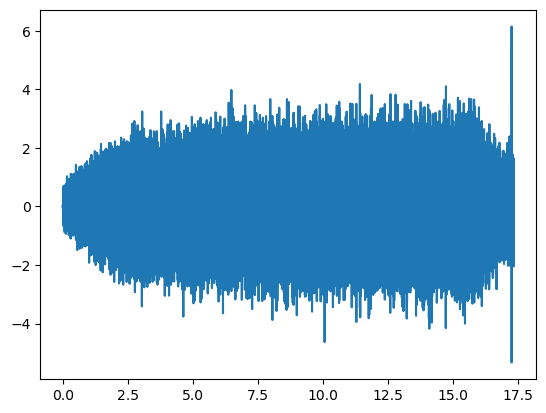

In [15]:
plt.plot(time, y_calced)

In [16]:
sf.write(os.path.join('data', 'no_wind.wav'), y_calced, sr, subtype='PCM_24')